<a href="https://colab.research.google.com/github/mrturizo/clustering-for-parkinson/blob/3pca/V2_(3PCA)_Parkinson_california_Aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje no supervisado

## Librerías

In [ ]:
# Manejo de archivos Pandas
import pandas as pd

# Manejo de matrices
import numpy as np

# División de los datos en entrenamiento y testing
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Metricas bonitas
from yellowbrick.classifier import confusion_matrix as  cm
from yellowbrick.classifier import classification_report as cr
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import class_prediction_error

# Herramientas
## Encoder, paso de variables categóricas a numéricas
from sklearn.preprocessing import LabelEncoder
## Para preprocesar las features
from sklearn import preprocessing

#Balance de clases
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids 
from imblearn.under_sampling import NearMiss

# Visualización y gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# PCA
from sklearn.decomposition import PCA   

# Aprendizajae NO supervisado
## Hacer K-Means
from sklearn.cluster import KMeans
## Hacer el dendograma de la agrupación jerárquica
from scipy.cluster.hierarchy import dendrogram, linkage
## Hacer las predicciones con agrupación jerárquica
from sklearn.cluster import AgglomerativeClustering

# Aprendizaje supervisado
## Algoritmos de ML para clasificación (13)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
## Algoritmos de ML para regresión (10)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV

# Importancia de características
from yellowbrick.model_selection import FeatureImportances

# Guardar y cargar modelos
import joblib

# Filtrar advertencias
import warnings
warnings.filterwarnings('ignore')

## Lectura de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta donde se encuentran los datos en Drive
path_datos = "/content/drive/MyDrive/Datasets_IA_FIA"

In [ ]:
# Construir el dataset
df = pd.read_csv(path_datos+"/entro_california_5s_no_overlapping.csv")
df 

,center,subject,group,channel,epoch,permutation,sample,approximate,svd_ent,higuchi_fd,hjort_mobility,hjort_complexity,detrended_fluct,katz_fd,petrosian_fd
0,california,hc1,hc,Fp1,0,0.535592,0.455746,0.512261,0.303846,1.058956,0.125078,1.499173,1.337261,2.236249,1.003020
1,california,hc1,hc,Fp1,1,0.543739,0.461977,0.514786,0.310570,1.069328,0.127707,1.570329,1.292437,2.204414,1.003241
2,california,hc1,hc,Fp1,2,0.544964,0.453863,0.531460,0.319863,1.072979,0.134838,1.499481,1.264214,2.185184,1.003261
3,california,hc1,hc,Fp1,3,0.546578,0.502843,0.553638,0.334982,1.072960,0.149332,1.391791,1.245275,2.340953,1.003301
4,california,hc1,hc,Fp1,4,0.541556,0.449175,0.511589,0.306226,1.063332,0.125329,1.552507,1.318398,2.264597,1.003181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32795,california,pd28,pd,P7,26,0.533278,0.384642,0.448414,0.282010,1.051977,0.110756,1.522297,1.394109,2.060245,1.002960
32796,california,pd28,pd,P7,27,0.532576,0.395124,0.476242,0.292245,1.055243,0.116832,1.532433,1.353034,2.144715,1.002940
32797,california,pd28,pd,P7,28,0.532125,0.422327,0.502344,0.301661,1.053476,0.125326,1.415821,1.311580,2.191253,1.002920
32798,california,pd28,pd,P7,29,0.540256,0.428145,0.515055,0.319130,1.063302,0.137782,1.381416,1.249807,2.172287,1.003141


## AED

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32800 entries, 0 to 32799
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   center            32800 non-null  object 
 1   subject           32800 non-null  object 
 2   group             32800 non-null  object 
 3   channel           32800 non-null  object 
 4   epoch             32800 non-null  int64  
 5   permutation       32800 non-null  float64
 6   sample            32800 non-null  float64
 7   approximate       32800 non-null  float64
 8   svd_ent           32800 non-null  float64
 9   higuchi_fd        32800 non-null  float64
 10  hjort_mobility    32800 non-null  float64
 11  hjort_complexity  32800 non-null  float64
 12  detrended_fluct   32800 non-null  float64
 13  katz_fd           32800 non-null  float64
 14  petrosian_fd      32800 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df.groupby('group').describe()

epoch                                                   permutation  \
         count       mean        std  min  25%   50%   75%   max       count   
group                                                                          
hc     16672.0  15.833013   9.486154  0.0  8.0  16.0  24.0  36.0     16672.0   
pd     16128.0  16.597222  10.270791  0.0  8.0  16.0  25.0  46.0     16128.0   

                 ...   katz_fd           petrosian_fd                      \
           mean  ...       75%       max        count      mean       std   
group            ...                                                        
hc     0.541556  ...  2.299521  2.758497      16672.0  1.003179  0.000327   
pd     0.537592  ...  2.285683  2.660679      16128.0  1.003074  0.000281   

                                                        
            min      25%       50%       75%       max  
group                                                   
hc     1.001972  1.00296  1.003201  1.003422  1.004102  
pd     1.001770  1.00292  1.003101  1.003261  1.004062  

[2 rows x 88 columns]

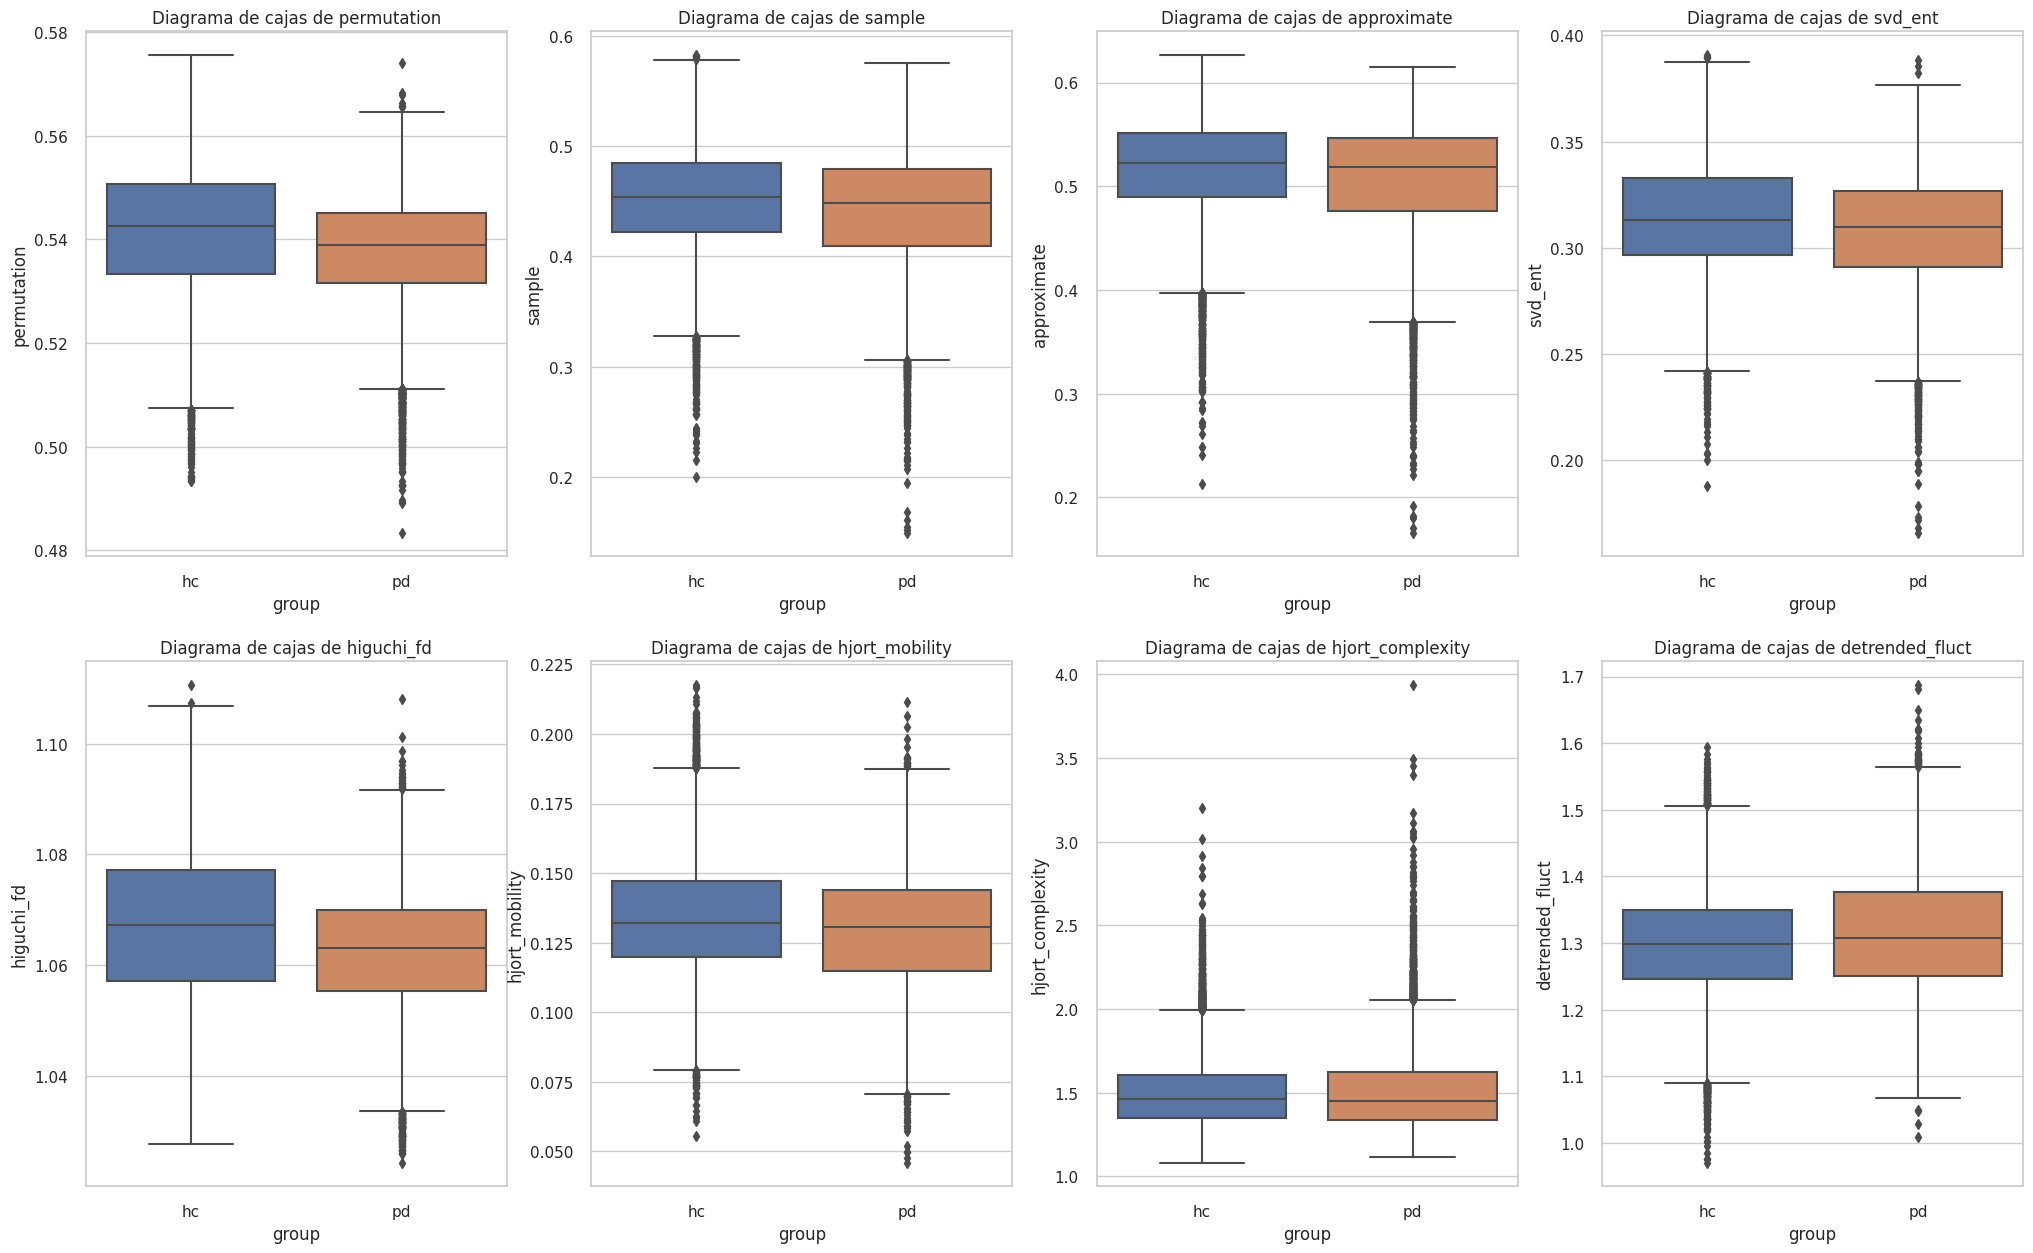

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(2, 4, figsize=(25, 15))

sns.boxplot(x="group", y="permutation", data=df, ax=ax[0,0])
ax[0,0].set_title("Diagrama de cajas de permutation")

sns.boxplot(x="group", y="sample", data=df, ax=ax[0,1])
ax[0,1].set_title("Diagrama de cajas de sample")

sns.boxplot(x="group", y="approximate", data=df, ax=ax[0,2])
ax[0,2].set_title("Diagrama de cajas de approximate")

sns.boxplot(x="group", y="svd_ent", data=df, ax=ax[0,3])
ax[0,3].set_title("Diagrama de cajas de svd_ent")


sns.boxplot(x="group", y="higuchi_fd", data=df, ax=ax[1,0])
ax[1,0].set_title("Diagrama de cajas de higuchi_fd")

sns.boxplot(x="group", y="hjort_mobility", data=df, ax=ax[1,1])
ax[1,1].set_title("Diagrama de cajas de hjort_mobility")

sns.boxplot(x="group", y="hjort_complexity", data=df, ax=ax[1,2])
ax[1,2].set_title("Diagrama de cajas de hjort_complexity")

sns.boxplot(x="group", y="detrended_fluct", data=df, ax=ax[1,3])
ax[1,3].set_title("Diagrama de cajas de detrended_fluct")

plt.show()

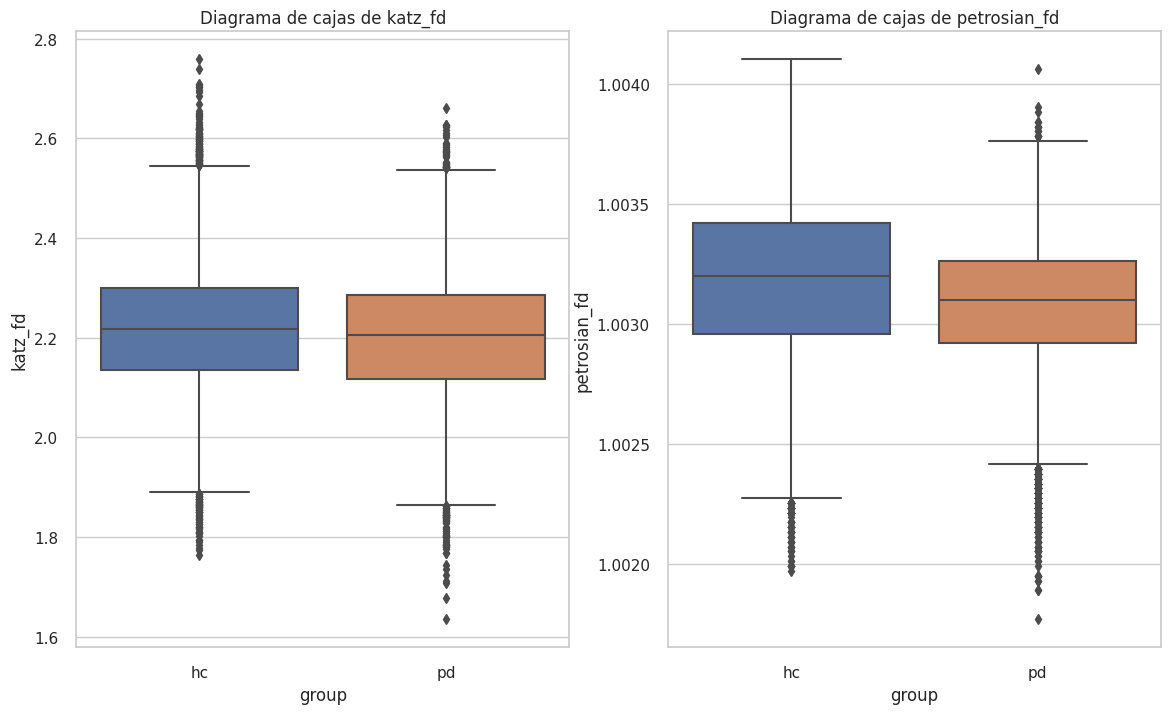

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

sns.boxplot(x="group", y="katz_fd", data=df, ax=ax[0])
ax[0].set_title("Diagrama de cajas de katz_fd")

sns.boxplot(x="group", y="petrosian_fd", data=df, ax=ax[1])
ax[1].set_title("Diagrama de cajas de petrosian_fd")

plt.show()

### Mapa de calor

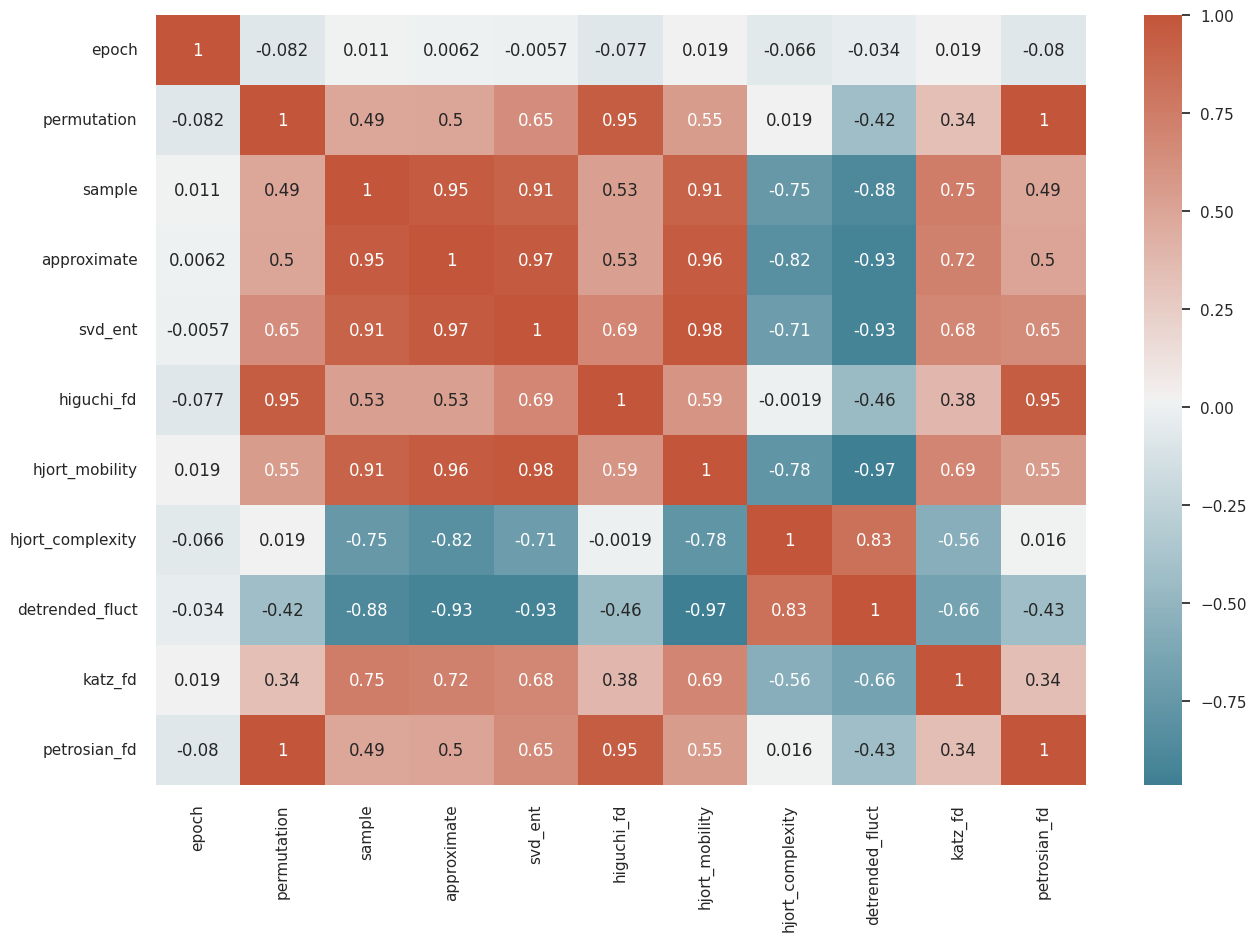

In [ ]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

### distribución clases

Rows, Columns: (32800, 15)
group
hc    16672
pd    16128
dtype: int64 ['hc' 'pd'] [16672 16128]


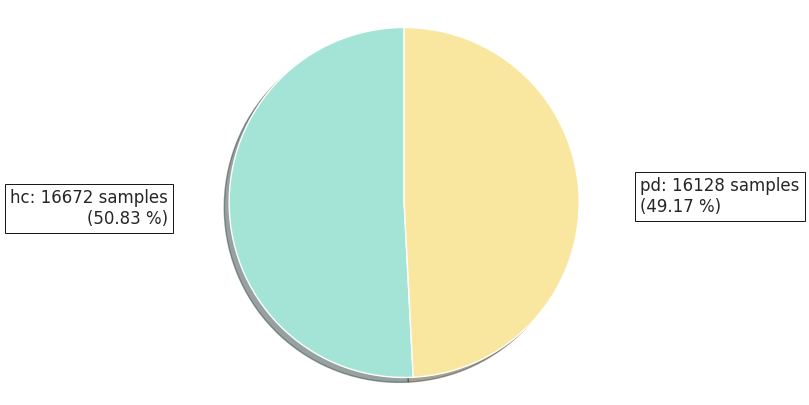

In [ ]:
print("Rows, Columns:",df.shape)
Clases = df.groupby('group').size()
labels = Clases.index.values
sizes = Clases.values
print(Clases,labels,sizes)
muestra = []

for k in range(0,labels.size):
  texto = str(labels[k])+': '+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)

colors = ['#A3E4D7','#F9E79F','#D5DBDB','#E6B0AA','#D7BDE2','#A9CCE3','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60','#A569BD','#C0392B','#138D75']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(10,5),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

## Dividir en datos de entrenamiento y testing

In [ ]:
# Obtener las features
features = df.drop(['group'], axis=1) #Eliminar la columna group
features.head()

,center,subject,channel,epoch,permutation,sample,approximate,svd_ent,higuchi_fd,hjort_mobility,hjort_complexity,detrended_fluct,katz_fd,petrosian_fd
0,california,hc1,Fp1,0,0.535592,0.455746,0.512261,0.303846,1.058956,0.125078,1.499173,1.337261,2.236249,1.003020
1,california,hc1,Fp1,1,0.543739,0.461977,0.514786,0.310570,1.069328,0.127707,1.570329,1.292437,2.204414,1.003241
2,california,hc1,Fp1,2,0.544964,0.453863,0.531460,0.319863,1.072979,0.134838,1.499481,1.264214,2.185184,1.003261
3,california,hc1,Fp1,3,0.546578,0.502843,0.553638,0.334982,1.072960,0.149332,1.391791,1.245275,2.340953,1.003301
4,california,hc1,Fp1,4,0.541556,0.449175,0.511589,0.306226,1.063332,0.125329,1.552507,1.318398,2.264597,1.003181


In [ ]:
# Obtener los labels
labels = df['group'] 
labels.head()

0    hc
1    hc
2    hc
3    hc
4    hc
Name: group, dtype: object

In [ ]:
# Obtener las features cuantitativas (quitar cualitativas)
features = features.drop(['center', 'subject', 'channel', 'epoch'], axis=1) #Eliminar la columnas no numéricas
features.head()

,permutation,sample,approximate,svd_ent,higuchi_fd,hjort_mobility,hjort_complexity,detrended_fluct,katz_fd,petrosian_fd
0,0.535592,0.455746,0.512261,0.303846,1.058956,0.125078,1.499173,1.337261,2.236249,1.003020
1,0.543739,0.461977,0.514786,0.310570,1.069328,0.127707,1.570329,1.292437,2.204414,1.003241
2,0.544964,0.453863,0.531460,0.319863,1.072979,0.134838,1.499481,1.264214,2.185184,1.003261
3,0.546578,0.502843,0.553638,0.334982,1.072960,0.149332,1.391791,1.245275,2.340953,1.003301
4,0.541556,0.449175,0.511589,0.306226,1.063332,0.125329,1.552507,1.318398,2.264597,1.003181


In [ ]:
# Separación de la data, con un 20% para testing, y 80% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.20, random_state=1, stratify=labels)

In [ ]:
# Verificacion de la cantidad de datos para entrenamiento y para testing
print("y_train labels unique:",np.unique(y_train, return_counts=True))
print("y_test labels unique: ",np.unique(y_test, return_counts=True)) 

y_train labels unique: (array(['hc', 'pd'], dtype=object), array([13338, 12902]))
y_test labels unique:  (array(['hc', 'pd'], dtype=object), array([3334, 3226]))


##  PCA

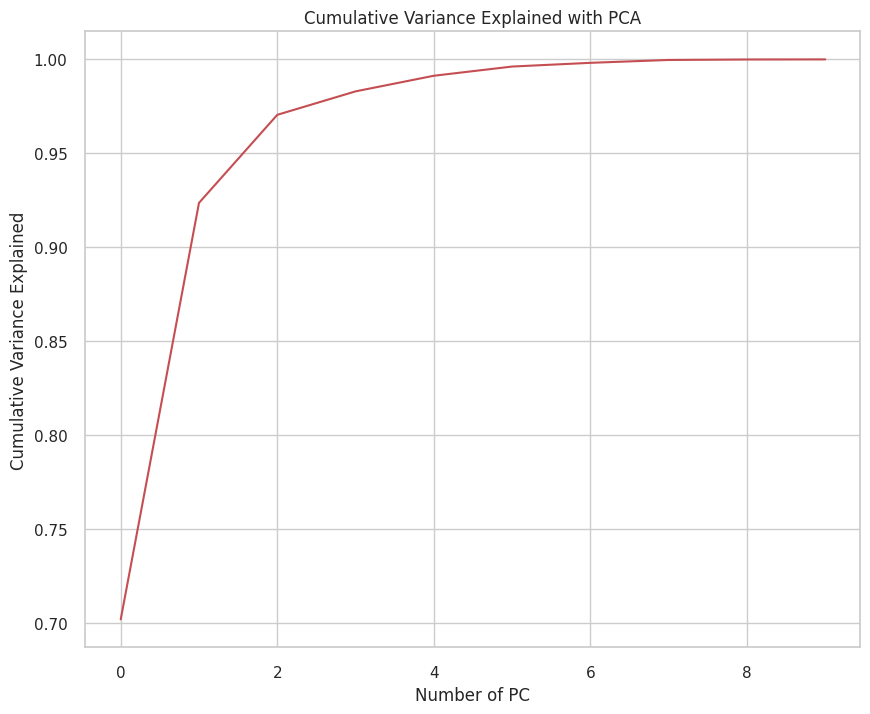

In [ ]:
# Hacer escalamiento a los datos
scalar = preprocessing.StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(features)) 
scaled_data.head()
# PCA con varianza acumulada
pca = PCA()
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca)
data_pca.head()

# Plot the cumulative variance explained

plt.figure(figsize = (10, 8))
plt.plot(list(range(scaled_data.shape[1])), np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.xlabel('Number of PC'); plt.ylabel('Cumulative Variance Explained');
plt.title('Cumulative Variance Explained with PCA');


# gráfico de sedimentación
# 0 sería el componente 1 (así es python)
# se usan los componentes que tengan al menos el 80% de la variacón - un número muy cercano

### intentaremos con 3 componentes


In [ ]:
pca.explained_variance_ratio_

array([7.02016531e-01, 2.21627923e-01, 4.68570451e-02, 1.24815661e-02,
       8.31150481e-03, 4.89801677e-03, 1.97833351e-03, 1.52251389e-03,
       2.55116696e-04, 5.14493936e-05])

In [ ]:
print("correlaciones entre componentes")
# Preparación del PCA para ver el impacto de las features
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

correlaciones entre componentes


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
permutation,-0.680464,0.721170,0.023662,0.014834,-0.119340,0.039989,-0.000081,0.006120,-0.001302,-0.015867
sample,-0.934705,-0.193949,-0.061473,-0.272814,0.045424,0.082270,0.041066,-0.000544,-0.003888,-0.000146
approximate,-0.962062,-0.217545,0.054319,-0.095564,-0.036411,-0.048774,-0.104640,0.005555,0.019340,0.000619
svd_ent,-0.989461,-0.032570,0.097745,0.018758,0.029961,-0.073714,-0.014235,0.045201,-0.038108,0.000874
higuchi_fd,-0.710130,0.678916,-0.000875,-0.006129,0.148512,-0.092798,0.015569,-0.061946,0.005728,-0.000905


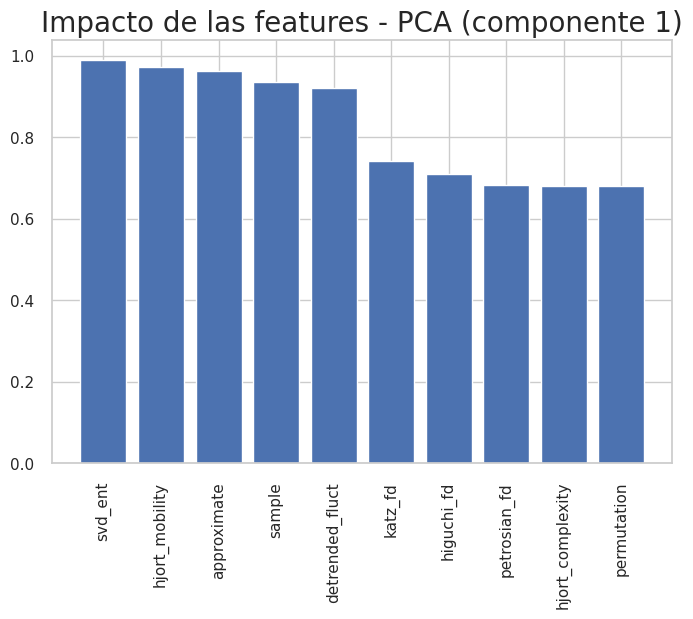

In [ ]:
# Analizar el impacto de las features según la primera componente del PCA
pc1_loadings = abs(loadings).sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Feature', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Feature'], height=pc1_loadings['CorrelationWithPC1'])
plt.title('Impacto de las features - PCA (componente 1)', size=20)
plt.xticks(rotation='vertical')
plt.show()

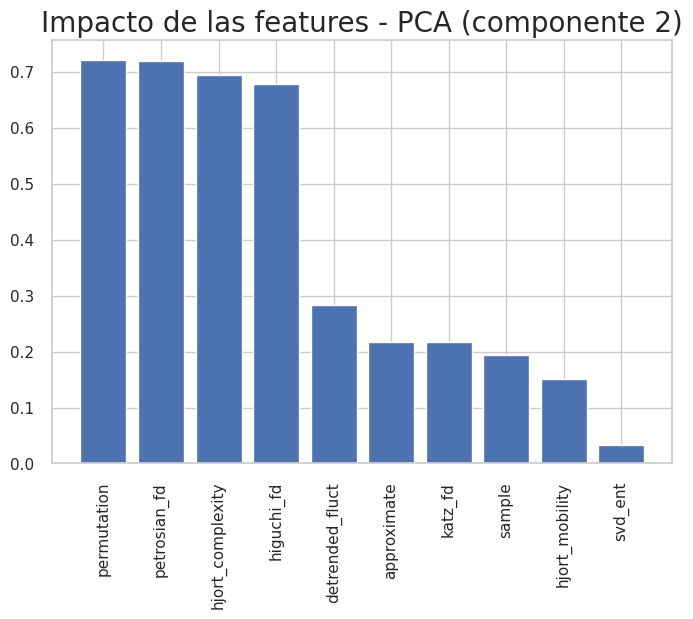

In [ ]:
# Analizar el impacto de las features según la primera componente del PCA
pc2_loadings = abs(loadings).sort_values(by='PC2', ascending=False)[['PC2']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Feature', 'CorrelationWithPC2']

plt.bar(x=pc2_loadings['Feature'], height=pc2_loadings['CorrelationWithPC2'])
plt.title('Impacto de las features - PCA (componente 2)', size=20)
plt.xticks(rotation='vertical')
plt.show()

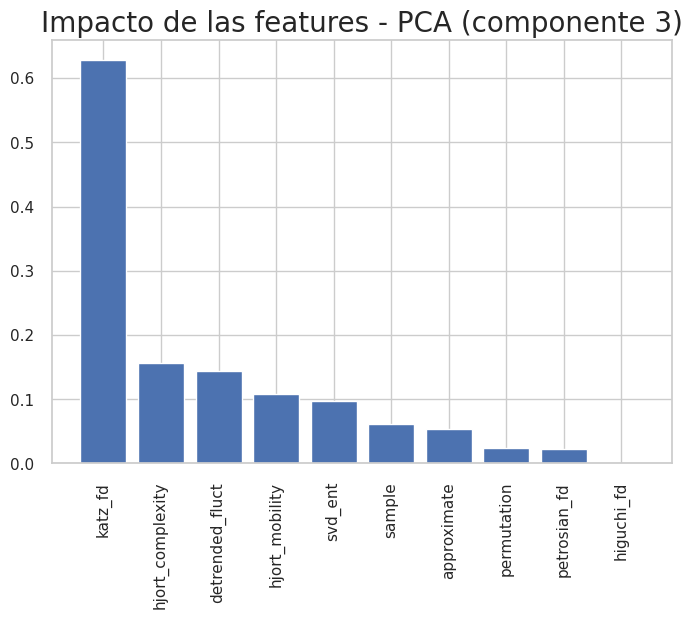

In [ ]:
# Analizar el impacto de las features según la primera componente del PCA
pc3_loadings = abs(loadings).sort_values(by='PC3', ascending=False)[['PC3']]
pc3_loadings = pc3_loadings.reset_index()
pc3_loadings.columns = ['Feature', 'CorrelationWithPC3']

plt.bar(x=pc3_loadings['Feature'], height=pc3_loadings['CorrelationWithPC3'])
plt.title('Impacto de las features - PCA (componente 3)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Hacer PCA para obtener una cantidad indicada de componentes principales
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2', 'PC3'])
data_pca.head()

,PC1,PC2,PC3
0,0.510517,-0.493094,-0.393576
1,-0.298228,0.598691,-0.027336
2,-0.885905,0.552565,0.405265
3,-2.468004,-0.041890,-0.436289
4,0.090086,0.209522,-0.550511


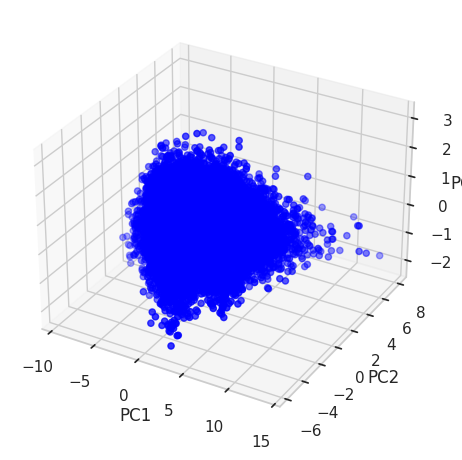

In [ ]:
# Gráfico de las tres componentes
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca['PC1'], data_pca['PC2'], data_pca['PC3'], c='blue', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

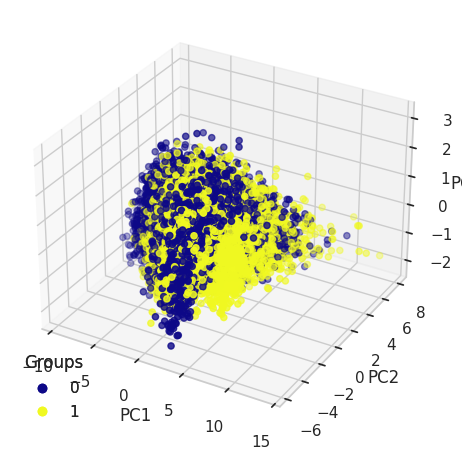

In [ ]:
# Gráfico de las tres componentes y los labels reales
data_pca_labels = pd.concat([data_pca,df["group"]],axis=1)


# Mapear los valores de los grupos "hc" y "pd" a los valores 0 y 1 respectivamente
group_map = {"hc": 0, "pd": 1}
data_pca_labels['group_num'] = data_pca_labels['group'].map(group_map)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos
scatter = ax.scatter(data_pca['PC1'], data_pca['PC2'], data_pca['PC3'], c=data_pca_labels['group_num'], cmap='plasma')

# Agregar la leyenda y tpitulo de ejes
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Groups")
ax.add_artist(legend)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


In [ ]:
data_pca_labels.head()

,PC1,PC2,PC3,group,group_num
0,0.510517,-0.493094,-0.393576,hc,0
1,-0.298228,0.598691,-0.027336,hc,0
2,-0.885905,0.552565,0.405265,hc,0
3,-2.468004,-0.041890,-0.436289,hc,0
4,0.090086,0.209522,-0.550511,hc,0


## Análisis Jerárquico

In [ ]:
# Graficar el Dendograma
plt.figure(figsize=(8, 8))
plt.title("Dendograma")
dendrogram(linkage(data_pca, #features_2_pca
            method='ward', metric="euclidean"))
plt.axhline(y = 300, color = 'black', linestyle = '-') 

In [ ]:
# Predecir en base al dendograma eligiendo un número de clusters
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters_hc = hierarchical_cluster.fit_predict(data_pca)

In [ ]:
clusters_hc

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Gráfico de las dos componentes, y los clusters
##sns.jointplot(data=data_pca, x="PC1", y="PC2", hue=clusters_hc)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca['PC1'], data_pca['PC2'], data_pca['PC3'], c=clusters_hc, cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

## K-means

In [ ]:
# K-means con 2 clusters por conocimiento del problema SÓLO CON LAS DOS COMPONENTES DEL PCA
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_pca)
print(kmeans.cluster_centers_)

[[ 2.2087349  -0.10736393  0.00533884]
 [-2.00082377  0.09725762 -0.00483628]]


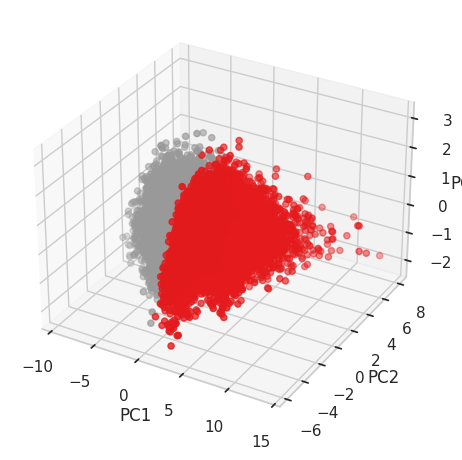

In [ ]:
# Gráfico de las dos componentes, los clusters, y los centroides 
###plt.figure(figsize=(6,6))
###plt.scatter(np.array(data_pca)[:,0], np.array(data_pca)[:,1], s=10, c=kmeans.labels_, cmap='Set1')
###plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="b", s=70)
###plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_pca['PC1'], data_pca['PC2'], data_pca['PC3'], c=kmeans.labels_, cmap='Set1')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='b', marker='o', s=100)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


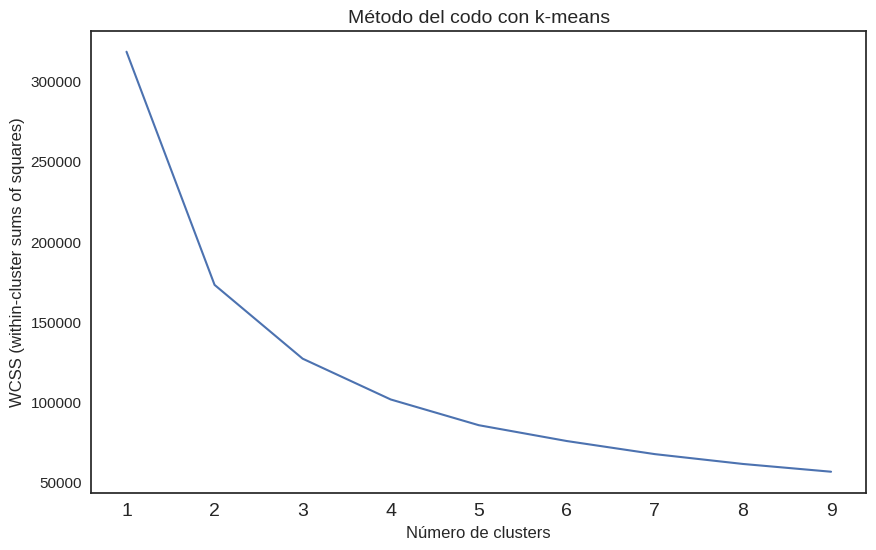

In [ ]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state=0)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 10), wcss)
    plt.title('Método del codo con k-means',fontsize=14)
    plt.xlabel('Número de clusters')
    plt.ylabel('WCSS (within-cluster sums of squares)')
    plt.xticks(fontsize=14)
    
    #plt.vlines(x=4,ymin=0,ymax=max(wcss),linestyles='--')
    #plt.text(x=4.5,y=max(wcss),s='4 clusters')

    #por el ejemplo

    plt.show()